# QMSolve Solutions for the Schrodinger Equation

Firstly, some important information for the solutions to the equation:

The Schrodinger Equation in 3 Cartesian Dimensions
$$
\frac{\hbar}{2m}\left(\frac{\partial^2\psi}{\partial x^2} +\frac{\partial^2\psi}{\partial y^2} + \frac{\partial^2\psi}{\partial z^2} \ \right) + V(x,y,z)\psi(x,y,z) = 
E\psi(x,y,z)
$$
In spherical coordinates, using the laplcian operator for simplicity:
$$
\frac{\hbar}{2m}\nabla^2 + V(r,\theta,\phi)\psi(r,\theta,\phi) = 
E\psi(r,\theta,\phi)
$$
Where:
$$
\nabla^2 = \frac{1}{r^2} \frac{\partial}{\partial r} \left( r^2   \frac{\partial}{\partial r}\right) + \frac{1}{r^2 \sin{\theta}} \frac{\partial}{\partial \theta} \left( \sin{\theta} \frac{\partial}{\partial \theta}\right) + \frac{1}{r^2 \sin^2{\theta}} \frac{\partial^2}{\partial \phi^2}

In [1]:
import Constants
from Constants import *
import numpy as np
from qmsolve import *

# Example Pieces of Code from the QMSolve GitHub Page Below

# Harmonic Oscillator Eigenstates

Computing...
Took 0.026957273483276367


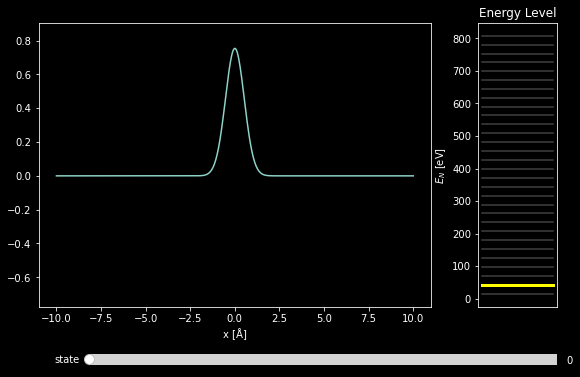

In [2]:
#define interaction potential
def harmonic_oscillator(particle):
    k = 100. * eV/Å**2
    return 0.5 * k * particle.x**2

#define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), 
                potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

eigenstates = H.solve(max_states = 30)

visualization = init_visualization(eigenstates)
visualization.slider_plot()

# Harmonic Oscillator Eigenstate Superposition

Computing...
Took 0.006001472473144531


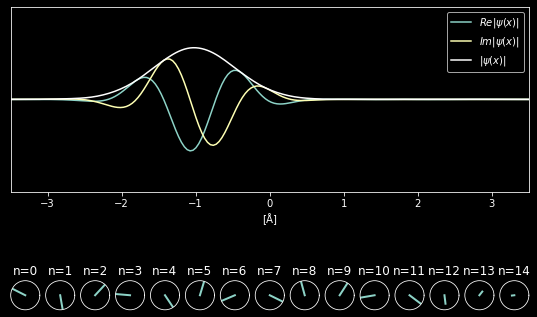

In [3]:
#=========================================================================================================#
#We define the Hamiltonian of a single particle confined in an harmonic oscillator potential. 
#Then, we compute its eigenstates.
#=========================================================================================================#


#interaction potential
def harmonic_oscillator(particle):

	k = 100 * eV / Å**2
	return 0.5 * k * particle.x**2


#define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), 
				potential = harmonic_oscillator, 
				spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

#=========================================================================================================#
#The next lines are used for visualizing a superposition of eigenstates, where 𝜓0 is a gaussian wave packet.
#=========================================================================================================#


x = np.linspace(-1.0*Å, 1.0*Å, len(eigenstates.array[0]))
𝜓0 = np.exp(-(x-0.16*Å)**2/(2*(0.05*Å)**2))

#compute the inner product of the initial state 𝜓0(x) with the eigenstates 𝜓_n(x). (coeffs = <𝜓_n|𝜓0>)
coeffs = np.dot(eigenstates.array, 𝜓0)*1.0j

#visualize a superposition of the eigenstates
visualization = init_visualization(eigenstates)
visualization.superpositions(coeffs[0:15], xlim=[-3.5*Å, 3.5*Å],save_animation=True)

# Interactive Fermions

Computing...
Took 1.7473957538604736


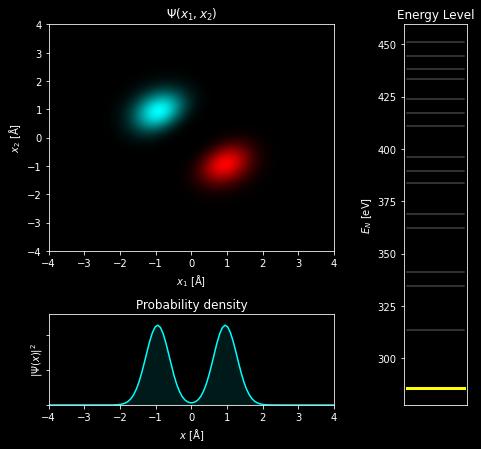

In [5]:
#interaction potential
def harmonic_oscillator_plus_coulomb_interaction(fermions):

	k = 1.029 

	V_harmonic = 0.5*k*fermions.x1**2 + 0.5*k*fermions.x2**2 

	k = 20.83 
	r = np.abs(fermions.x1 - fermions.x2)
	r = np.where(r < 0.0001, 0.0001, r)
	V_interaction = k/ r

	return V_harmonic + V_interaction




H = Hamiltonian(particles = TwoFermions(), 
				potential = harmonic_oscillator_plus_coulomb_interaction, 
				spatial_ndim = 1, N = 200, extent = 15*Å)


eigenstates = H.solve(max_states = 32)
#print(eigenstates.energies)

visualization = init_visualization(eigenstates)
visualization.animate(max_states = 32, xlim = [-4*Å,4*Å],save_animation=True)

# Non-Interactive Fermions

Computing...
Took 3.874378204345703


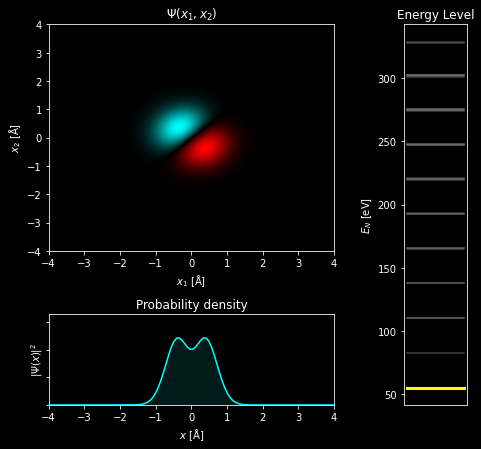

In [4]:
#interaction potential
def harmonic_oscillator(fermions):

	k = 1.029

	V = 0.5*k*fermions.x1**2 + 0.5*k*fermions.x2**2 
	return V



H = Hamiltonian(particles = TwoFermions(), 
				potential = harmonic_oscillator, 
				spatial_ndim = 1, N = 200, extent = 15*Å)


eigenstates = H.solve(max_states = 80)
#print(eigenstates.energies)

visualization = init_visualization(eigenstates)
visualization.animate(max_states = 32, xlim = [-4*Å,4*Å],save_animation=True)

# Four Gaussian Wells

In [2]:
#interaction potential
def four_gaussian_wells(particle):
	𝜇 = 1.0*Å
	σ = 0.5*Å
	V = 25.72*(4-np.exp((-(particle.x)**2 -(particle.y-𝜇)**2 -(particle.z)**2 ) / (2*σ**2))
	-np.exp((-(particle.x-𝜇)**2 -(particle.y)**2 -(particle.z)**2 ) / (2*σ**2))
	-np.exp((-(particle.x+𝜇)**2 -(particle.y)**2 -(particle.z)**2 ) / (2*σ**2))
	-np.exp((-(particle.x)**2 -(particle.y+𝜇)**2-(particle.z)**2  ) / (2*σ**2)))
	return V



H = Hamiltonian(particles = SingleParticle(), 
				potential = four_gaussian_wells, 
				spatial_ndim = 3, N = 100, extent = 5*Å)

eigenstates = H.solve( max_states = 50,  method ='lobpcg')

visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(40, contrast_vals = [0.1, 0.25])
visualization.animate(contrast_vals = [0.1, 0.25])

Computing...
Took 278.11834692955017


# 3D Hydrogen Atom

In [1]:
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, V,m


#interaction potential
def coulomb_potential(particle):

	k_c = 1.0 # (e*e / (4 * np.pi * epsilon_0))  

	r = np.sqrt((particle.x)**2 + (particle.y)**2 + (particle.z)**2)
	r = np.where(r < 0.000001, 0.000001, r)
	external_electric_field = 1e3*V/m #shows Stark effect

	return - k_c/ r + particle.z*external_electric_field





H = Hamiltonian(particles = SingleParticle(), 
				potential = coulomb_potential, 
				spatial_ndim = 3, N = 150, extent = 30*Å)


eigenstates = H.solve( max_states = 14, method ='lobpcg')

visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(5, contrast_vals = [0.01, 0.2])
visualization.animate(contrast_vals = [0.01, 0.2])

Computing...
Took 262.3686354160309


# Time Dependent Double Slit

100% |########################################################################|


Took 27.454908847808838


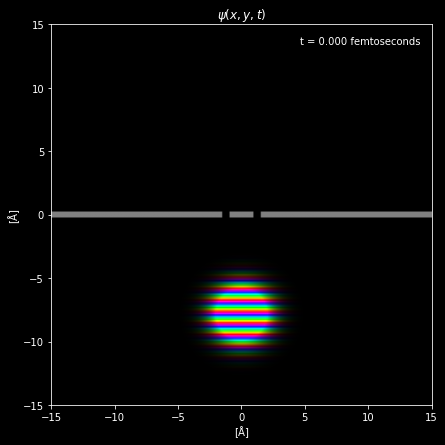

In [2]:
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, TimeSimulation, init_visualization, femtoseconds, m_e, Å

#=========================================================================================================#
#First, we define the Hamiltonian of a single particle
#=========================================================================================================#

#interaction potential
def double_slit(particle):
    b = 2.0* Å # slits separation
    a = 0.5* Å # slits width
    d = 0.5* Å # slits depth

    return np.where( ((particle.x < - b/2 - a) | (particle.x > b/2 + a) | ((particle.x > -b/2)  
                     & (particle.x < b/2))) & ((particle.y < d/2) & (particle.y > -d/2) ),  1e5,  0)


#build the Hamiltonian of the system
H = Hamiltonian(particles = SingleParticle(m = m_e), 
                potential = double_slit, 
                spatial_ndim = 2, N = 256, extent = 30 * Å)



#=========================================================================================================#
# Define the wavefunction at t = 0  (initial condition)
#=========================================================================================================#

def initial_wavefunction(particle):
    #This wavefunction correspond to a gaussian wavepacket with a mean Y momentum equal to p_y0
    σ = 1.0 * Å
    v0 = 80 * Å / femtoseconds
    p_y0 = m_e * v0
    return np.exp( -1/(4* σ**2) * ((particle.x-0)**2+(particle.y+8* Å)**2)) / np.sqrt(2*np.pi* σ**2)  *np.exp(p_y0*particle.y*1j)


#=========================================================================================================#
# Set and run the simulation
#=========================================================================================================#


total_time = 0.7 * femtoseconds
sim = TimeSimulation(hamiltonian = H, method = "split-step")
sim.run(initial_wavefunction, total_time = total_time, dt = total_time/8000., store_steps = 800)


#=========================================================================================================#
# Finally, we visualize the time dependent simulation
#=========================================================================================================#

visualization = init_visualization(sim)

visualization.animate(xlim=[-15* Å,15* Å], ylim=[-15* Å,15* Å], potential_saturation = 0.5, wavefunction_saturation = 0.2, animation_duration = 10, fps = 30, save_animation=True)

# Quantum Resonant Tunneling

100% |########################################################################|


Took 27.481331825256348


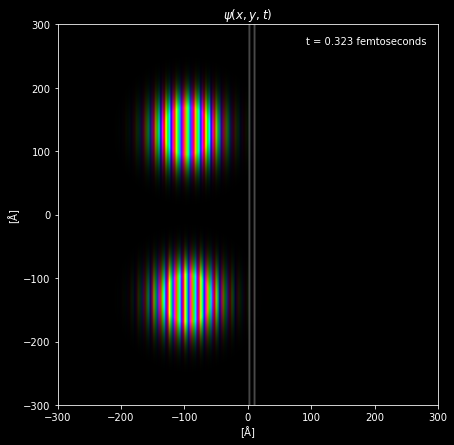

In [4]:
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, TimeSimulation, init_visualization, femtoseconds, m_e, Å, eV

#=========================================================================================================#
# First, we define the Hamiltonian of a single particle. 
# The interaction potential consists of a double potential barrier
#=========================================================================================================#


def potential(particle):
    
    #interaction potential
    a = 3*Å
    b = 5*Å
    V0 = 1.7*eV
    
    #first barrier
    V =  np.where((particle.x>0) & (particle.x<a) , V0, 0.)
    
    #second barrier
    V =  np.where((particle.x>a+b) & (particle.x<a+b+a)  , V + V0 , V)
    return V


#build the Hamiltonian of the system
H = Hamiltonian(particles = SingleParticle(m = m_e), 
                potential = potential, 
                spatial_ndim = 2, N = 256, extent = 700*Å)



#=========================================================================================================#
# Define the wavefunction at t = 0  (initial condition)
#=========================================================================================================#

E1 = 0.6*eV
E2 = 1.0*eV

σ = 25.0*Å
p1_x0 = np.sqrt(2*E1 / m_e)
p2_x0 = np.sqrt(2*E2 / m_e)

def initial_wavefunction(particle):
    #This wavefunction correspond to a gaussian wavepacket with a mean X momentum equal to p_x0
    return (np.exp( -1/(4* σ**2) * ((particle.x+100*Å)**2+ 1*(particle.y-250)**2)) / np.sqrt(2*np.pi* σ**2)  *np.exp(p1_x0*particle.x*1j) +
           np.exp( -1/(4* σ**2) * ((particle.x+100*Å)**2+ 1*(particle.y+250)**2)) / np.sqrt(2*np.pi* σ**2)  *np.exp(p2_x0*particle.x*1j))


#=========================================================================================================#
# Set and run the simulation
#=========================================================================================================#


total_time = 4000
sim = TimeSimulation(hamiltonian = H, method = "split-step")
sim.run(initial_wavefunction, total_time = total_time, dt = total_time/8000., store_steps = 800)


#=========================================================================================================#
# Finally, we visualize the time dependent simulation
#=========================================================================================================#

visualization = init_visualization(sim)

visualization.animate(xlim=[-300*Å,300*Å], ylim=[-300*Å,300*Å], potential_saturation = 0.3, wavefunction_saturation = 0.3, animation_duration = 10, fps = 30, save_animation=True)

# 2D Lattice Scattering

100% |########################################################################|


Took 10.520144939422607


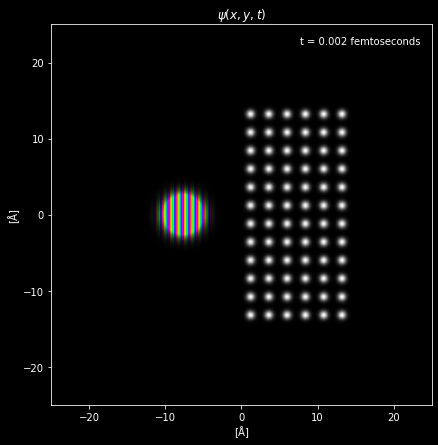

In [4]:
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, TimeSimulation, init_visualization, femtoseconds, m_e, Å


def lattice_point(x,y, x0,y0):
    σ = 0.5
    V0 = 40
    return V0*np.exp( -1/(4* σ**2) * ((x-x0)**2+(y-y0)**2))

Nx_point = 12
Ny_point = 12

x_point, y_point = np.meshgrid(np.linspace(-50/2, 50/2, Nx_point),
                               np.linspace(-50/2, 50/2, Ny_point))

#interaction potential
def lattice(particle):
    V = 0
    for i in range(0,Nx_point):
        for j in range(Ny_point//2,Ny_point):
            V += lattice_point(particle.x,particle.y, x_point[i,j],y_point[i,j])
    return V


#build the Hamiltonian of the system
H = Hamiltonian(particles = SingleParticle(m = m_e), 
                potential = lattice, 
                spatial_ndim = 2, N = 300, extent = 50 * Å)


# Define the wavefunction at t = 0  (initial condition)
def initial_wavefunction(particle):
    #This wavefunction correspond to a gaussian wavepacket with a mean X momentum equal to p_x0
    σ = 1.0 * Å
    v0 = 80 * Å / femtoseconds
    p_x0 = m_e * v0
    return np.exp( -1/(4* σ**2) * ((particle.x+15)**2+(particle.y-0)**2)) / np.sqrt(2*np.pi* σ**2)  *np.exp(p_x0*particle.x*1j)



# Set and run the simulation
total_time = 0.4 * femtoseconds
sim = TimeSimulation(hamiltonian = H, method = "split-step")
sim.run(initial_wavefunction, total_time = total_time, dt = total_time/2000., store_steps = 500)


# Finally, we visualize the time dependent simulation
visualization = init_visualization(sim)
visualization.animate(xlim=[-25* Å,25* Å], ylim=[-25* Å,25* Å], potential_saturation = 1.0, wavefunction_saturation = 0.1, animation_duration = 10, fps = 20, save_animation=True)